<center><img src="https://upload.wikimedia.org/wikipedia/commons/d/d6/UBER_%281%29.jpg" width="800" height="400">
</center>

### Context:
Ridesharing is a service that arranges transportation on short notice. It is a very volatile market and its demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time.

### Objective:
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas with over 110 million users worldwide. As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting actionable insights from data that will help in the growth of the the business.

### Key Questions:
What are the different variables that influence the number of pickups?
Which factor affects the number of pickups the most? What could be the possible reasons for that?
What are your recommendations to Uber management to capitalize on fluctuating demand?

### Data Description:
The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

pickup_dt: Date and time of the pick-up
borough: NYC's borough
pickups: Number of pickups for the period (hourly)
spd: Wind speed in miles/hour
vsb: Visibility in miles to the nearest tenth
temp: Temperature in Fahrenheit
dewp: Dew point in Fahrenheit
slp: Sea level pressure
pcp01: 1-hour liquid precipitation
pcp06: 6-hour liquid precipitation
pcp24: 24-hour liquid precipitation
sd: Snow depth in inches
hday: Being a holiday (Y) or not (N)

# Importing Libraries

import numpy as np
import pandas as pd

In [9]:
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv('Uber_Data (1) - Uber_Data (1).csv')

In [11]:
data.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,01-01-2015 1:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,01-01-2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,01-01-2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,01-01-2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [13]:
df = data.copy()

In [14]:
df.shape

(29101, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,28742.0,47.900019,19.798783,2.0,32.0,46.5,65.000000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


In [10]:
df.nunique()

pickup_dt    4343
borough         6
pickups      3406
spd           114
vsb           179
temp          295
dewp          305
slp           413
pcp01          80
pcp06         318
pcp24         484
sd            419
hday            2
dtype: int64

In [11]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

In [12]:
df['borough'].value_counts()

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: borough, dtype: int64

In [13]:
df['borough'].nunique()

6

In [14]:
df['hday'].value_counts()

N    27980
Y     1121
Name: hday, dtype: int64

In [15]:
df['hday'].value_counts(normalize=True)*100

N    96.147899
Y     3.852101
Name: hday, dtype: float64

In [16]:
#convert datetime

In [17]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'],format = '%d-%m-%Y %H:%M' )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [19]:
df.describe(include ='all').T

C:\Users\PRADEEP CHOUHAN\AppData\Local\Temp\ipykernel_15208\2557384405.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include ='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
pickup_dt,29101,4343,2015-01-01 01:00:00,7,2015-01-01 01:00:00,2015-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borough,26058,6,Bronx,4343,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.0,NaN,NaN,NaN,NaT,NaT,490.215903,995.649536,0.0,1.0,54.0,449.0,7883.0
spd,29101.0,NaN,NaN,NaN,NaT,NaT,5.984924,3.699007,0.0,3.0,6.0,8.0,21.0
vsb,29101.0,NaN,NaN,NaN,NaT,NaT,8.818125,2.442897,0.0,9.1,10.0,10.0,10.0
temp,28742.0,NaN,NaN,NaN,NaT,NaT,47.900019,19.798783,2.0,32.0,46.5,65.0,89.0
dewp,29101.0,NaN,NaN,NaN,NaT,NaT,30.823065,21.283444,-16.0,14.0,30.0,50.0,73.0
slp,29101.0,NaN,NaN,NaN,NaT,NaT,1017.817938,7.768796,991.4,1012.5,1018.2,1022.9,1043.4
pcp01,29101.0,NaN,NaN,NaN,NaT,NaT,0.00383,0.018933,0.0,0.0,0.0,0.0,0.28
pcp06,29101.0,NaN,NaN,NaN,NaT,NaT,0.026129,0.093125,0.0,0.0,0.0,0.0,1.24


In [20]:
df['pickup_dt'].min()

Timestamp('2015-01-01 01:00:00')

In [21]:
df['pickup_dt'].max()

Timestamp('2015-06-30 23:00:00')

In [22]:
df['start_year'] = df.pickup_dt.dt.year
df['start_month']= df.pickup_dt.dt.month_name()
df['start_hour']= df.pickup_dt.dt.hour
df['start_date']= df.pickup_dt.dt.day
df['week_day'] = df.pickup_dt.dt.day_name()


In [23]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_date,week_day
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


In [24]:
df.drop('pickup_dt',axis= 1,inplace =True)

In [25]:
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_date,week_day
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


In [26]:
df.isnull().sum()

borough        3043
pickups           0
spd               0
vsb               0
temp            359
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_hour        0
start_date        0
week_day          0
dtype: int64

In [27]:
df.borough.value_counts(normalize=True)*100

Bronx            16.666667
Brooklyn         16.666667
EWR              16.666667
Manhattan        16.666667
Queens           16.666667
Staten Island    16.666667
Name: borough, dtype: float64

In [28]:
df.borough.value_counts(normalize=True, dropna = False)*100

Bronx            14.923886
Brooklyn         14.923886
EWR              14.923886
Manhattan        14.923886
Queens           14.923886
Staten Island    14.923886
NaN              10.456685
Name: borough, dtype: float64

In [29]:
df['borough'].fillna('unknown',inplace = True)

In [30]:
df.borough.value_counts(normalize=True, dropna = False)*100

Bronx            14.923886
Brooklyn         14.923886
EWR              14.923886
Manhattan        14.923886
Queens           14.923886
Staten Island    14.923886
unknown          10.456685
Name: borough, dtype: float64

In [31]:
df['borough'].nunique()

7

In [32]:
df.isnull().sum()

borough          0
pickups          0
spd              0
vsb              0
temp           359
dewp             0
slp              0
pcp01            0
pcp06            0
pcp24            0
sd               0
hday             0
start_year       0
start_month      0
start_hour       0
start_date       0
week_day         0
dtype: int64

In [33]:
df.loc[df['temp'].isnull() ==True,'borough'].value_counts()

Brooklyn    359
Name: borough, dtype: int64

In [34]:
df.loc[df['temp'].isnull() ==True,'start_month'].value_counts()

January    359
Name: start_month, dtype: int64

In [35]:
df.loc[df['temp'].isnull() == True, 'start_date'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [36]:
df['start_month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [37]:
df['temp']= df['temp'].fillna(value = df.loc[df['borough'] == 'Brooklyn','temp'].mean())
df['temp']

0        30.00000
1        49.13913
2        30.00000
3        30.00000
4        30.00000
           ...   
29096    75.00000
29097    75.00000
29098    75.00000
29099    75.00000
29100    75.00000
Name: temp, Length: 29101, dtype: float64

In [38]:
df.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_date     0
week_day       0
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
# Observation on pick up

<AxesSubplot:xlabel='pickups', ylabel='Count'>

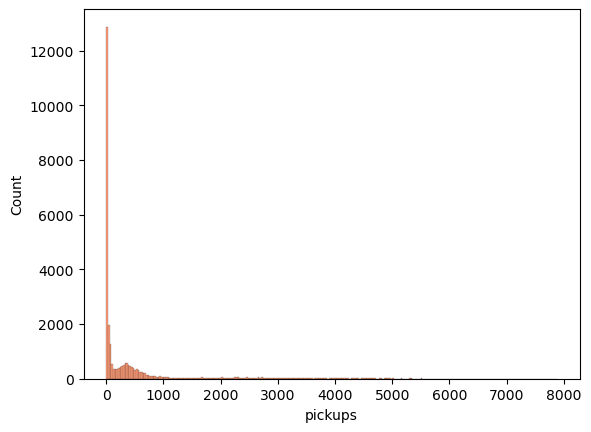

In [41]:
sns.histplot(data = df , x='pickups', color = 'coral')

<AxesSubplot:xlabel='pickups'>

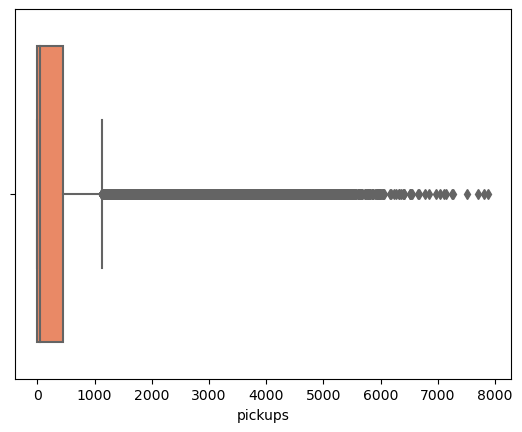

In [42]:
sns.boxplot(data= df , x ='pickups', color = 'coral')             # right skew

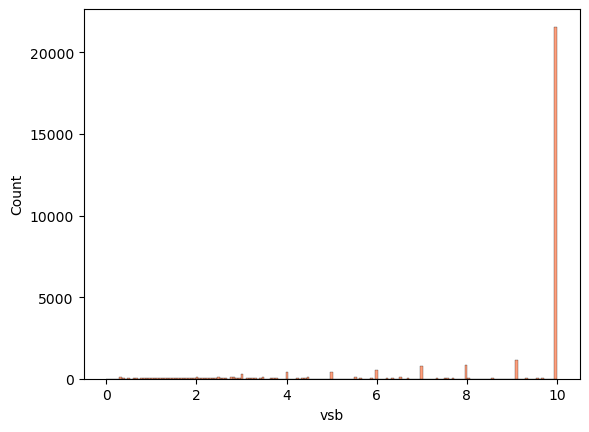

<AxesSubplot:xlabel='vsb'>

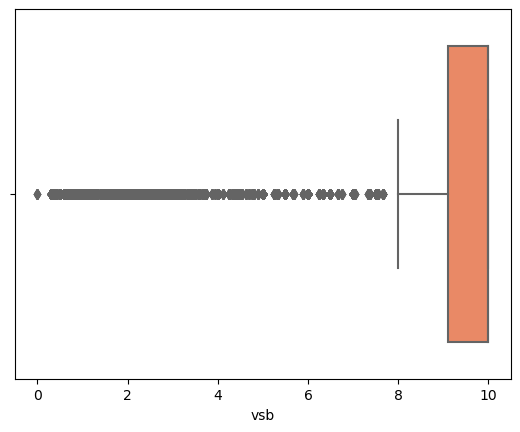

In [85]:
sns.histplot(data = df , x= 'vsb', color = 'coral')                          # left skew
plt.show()
sns.boxplot(data =df, x='vsb', color = 'coral')

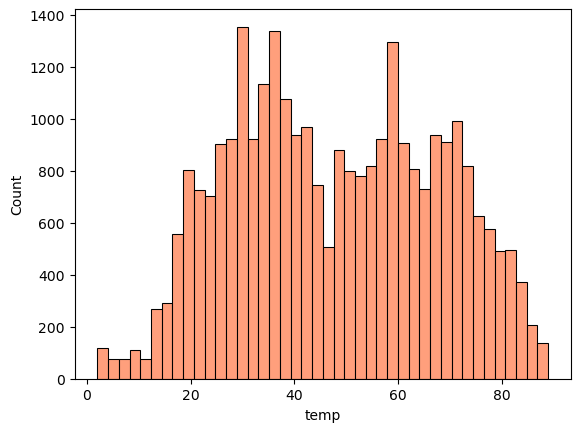

<AxesSubplot:xlabel='temp'>

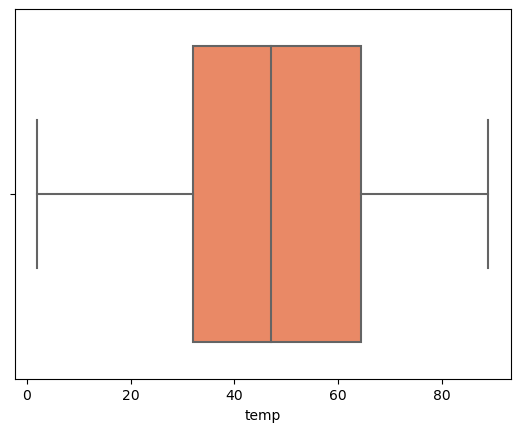

In [86]:
sns.histplot(data = df , x= 'temp', color = 'coral')
plt.show()
sns.boxplot(data =df, x='temp', color = 'coral')

<AxesSubplot:xlabel='hday', ylabel='count'>

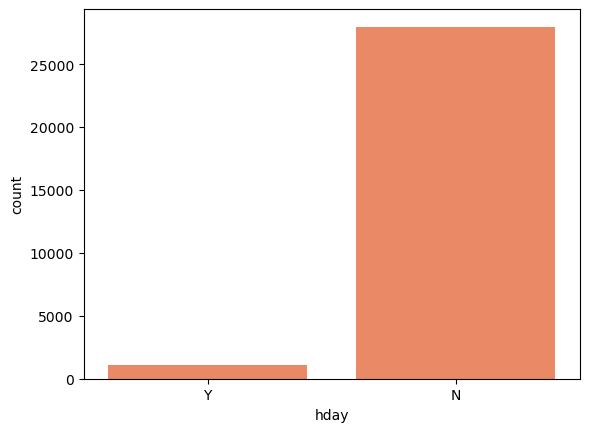

In [45]:
sns.countplot(data = df, x= 'hday', color = 'Coral')    # no. of non holidays

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'EWR'),
  Text(3, 0, 'Manhattan'),
  Text(4, 0, 'Queens'),
  Text(5, 0, 'Staten Island'),
  Text(6, 0, 'unknown')])

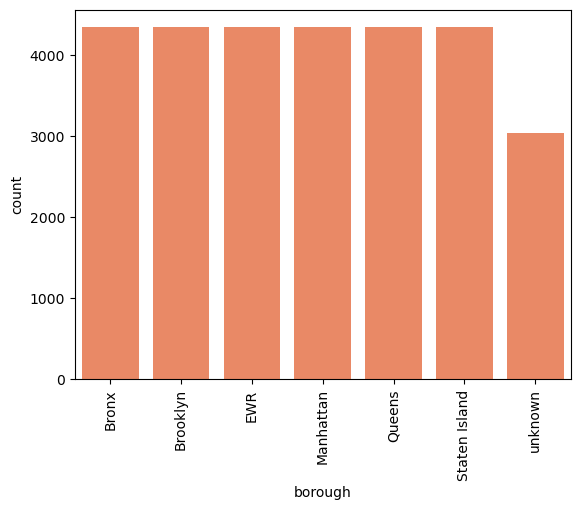

In [72]:
sns.countplot(data = df, x= 'borough', color = 'Coral')
plt.xticks(rotation = 90)

In [53]:
num = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']

<AxesSubplot:>

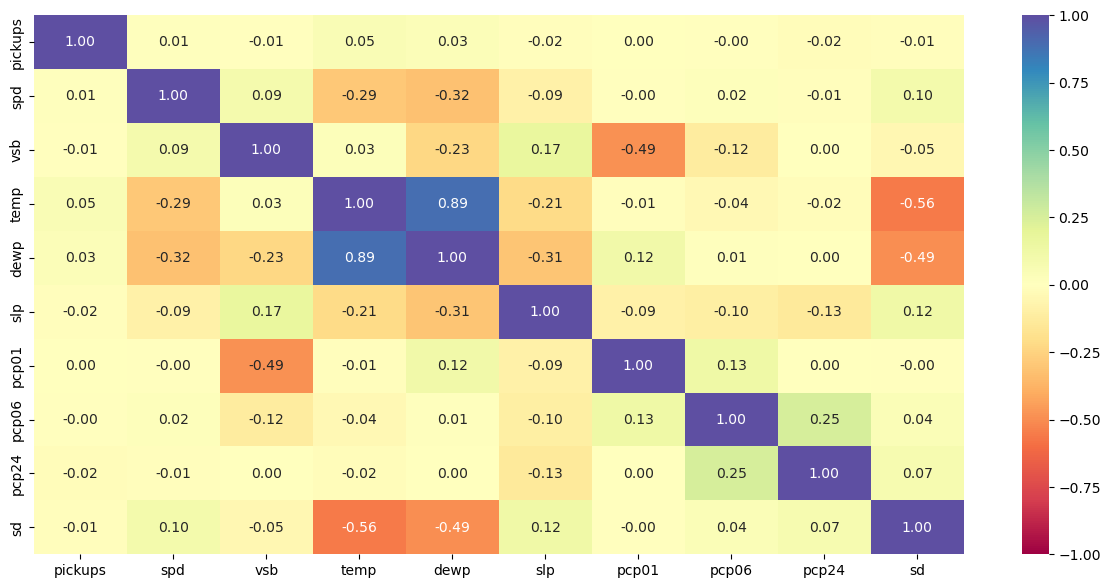

In [56]:
corr = df[num].corr()

plt.figure(figsize=(15,7))

sns.heatmap(corr, annot =True, vmin = -1, vmax= 1, fmt=".2f", cmap='Spectral')

<Figure size 2500x1500 with 0 Axes>

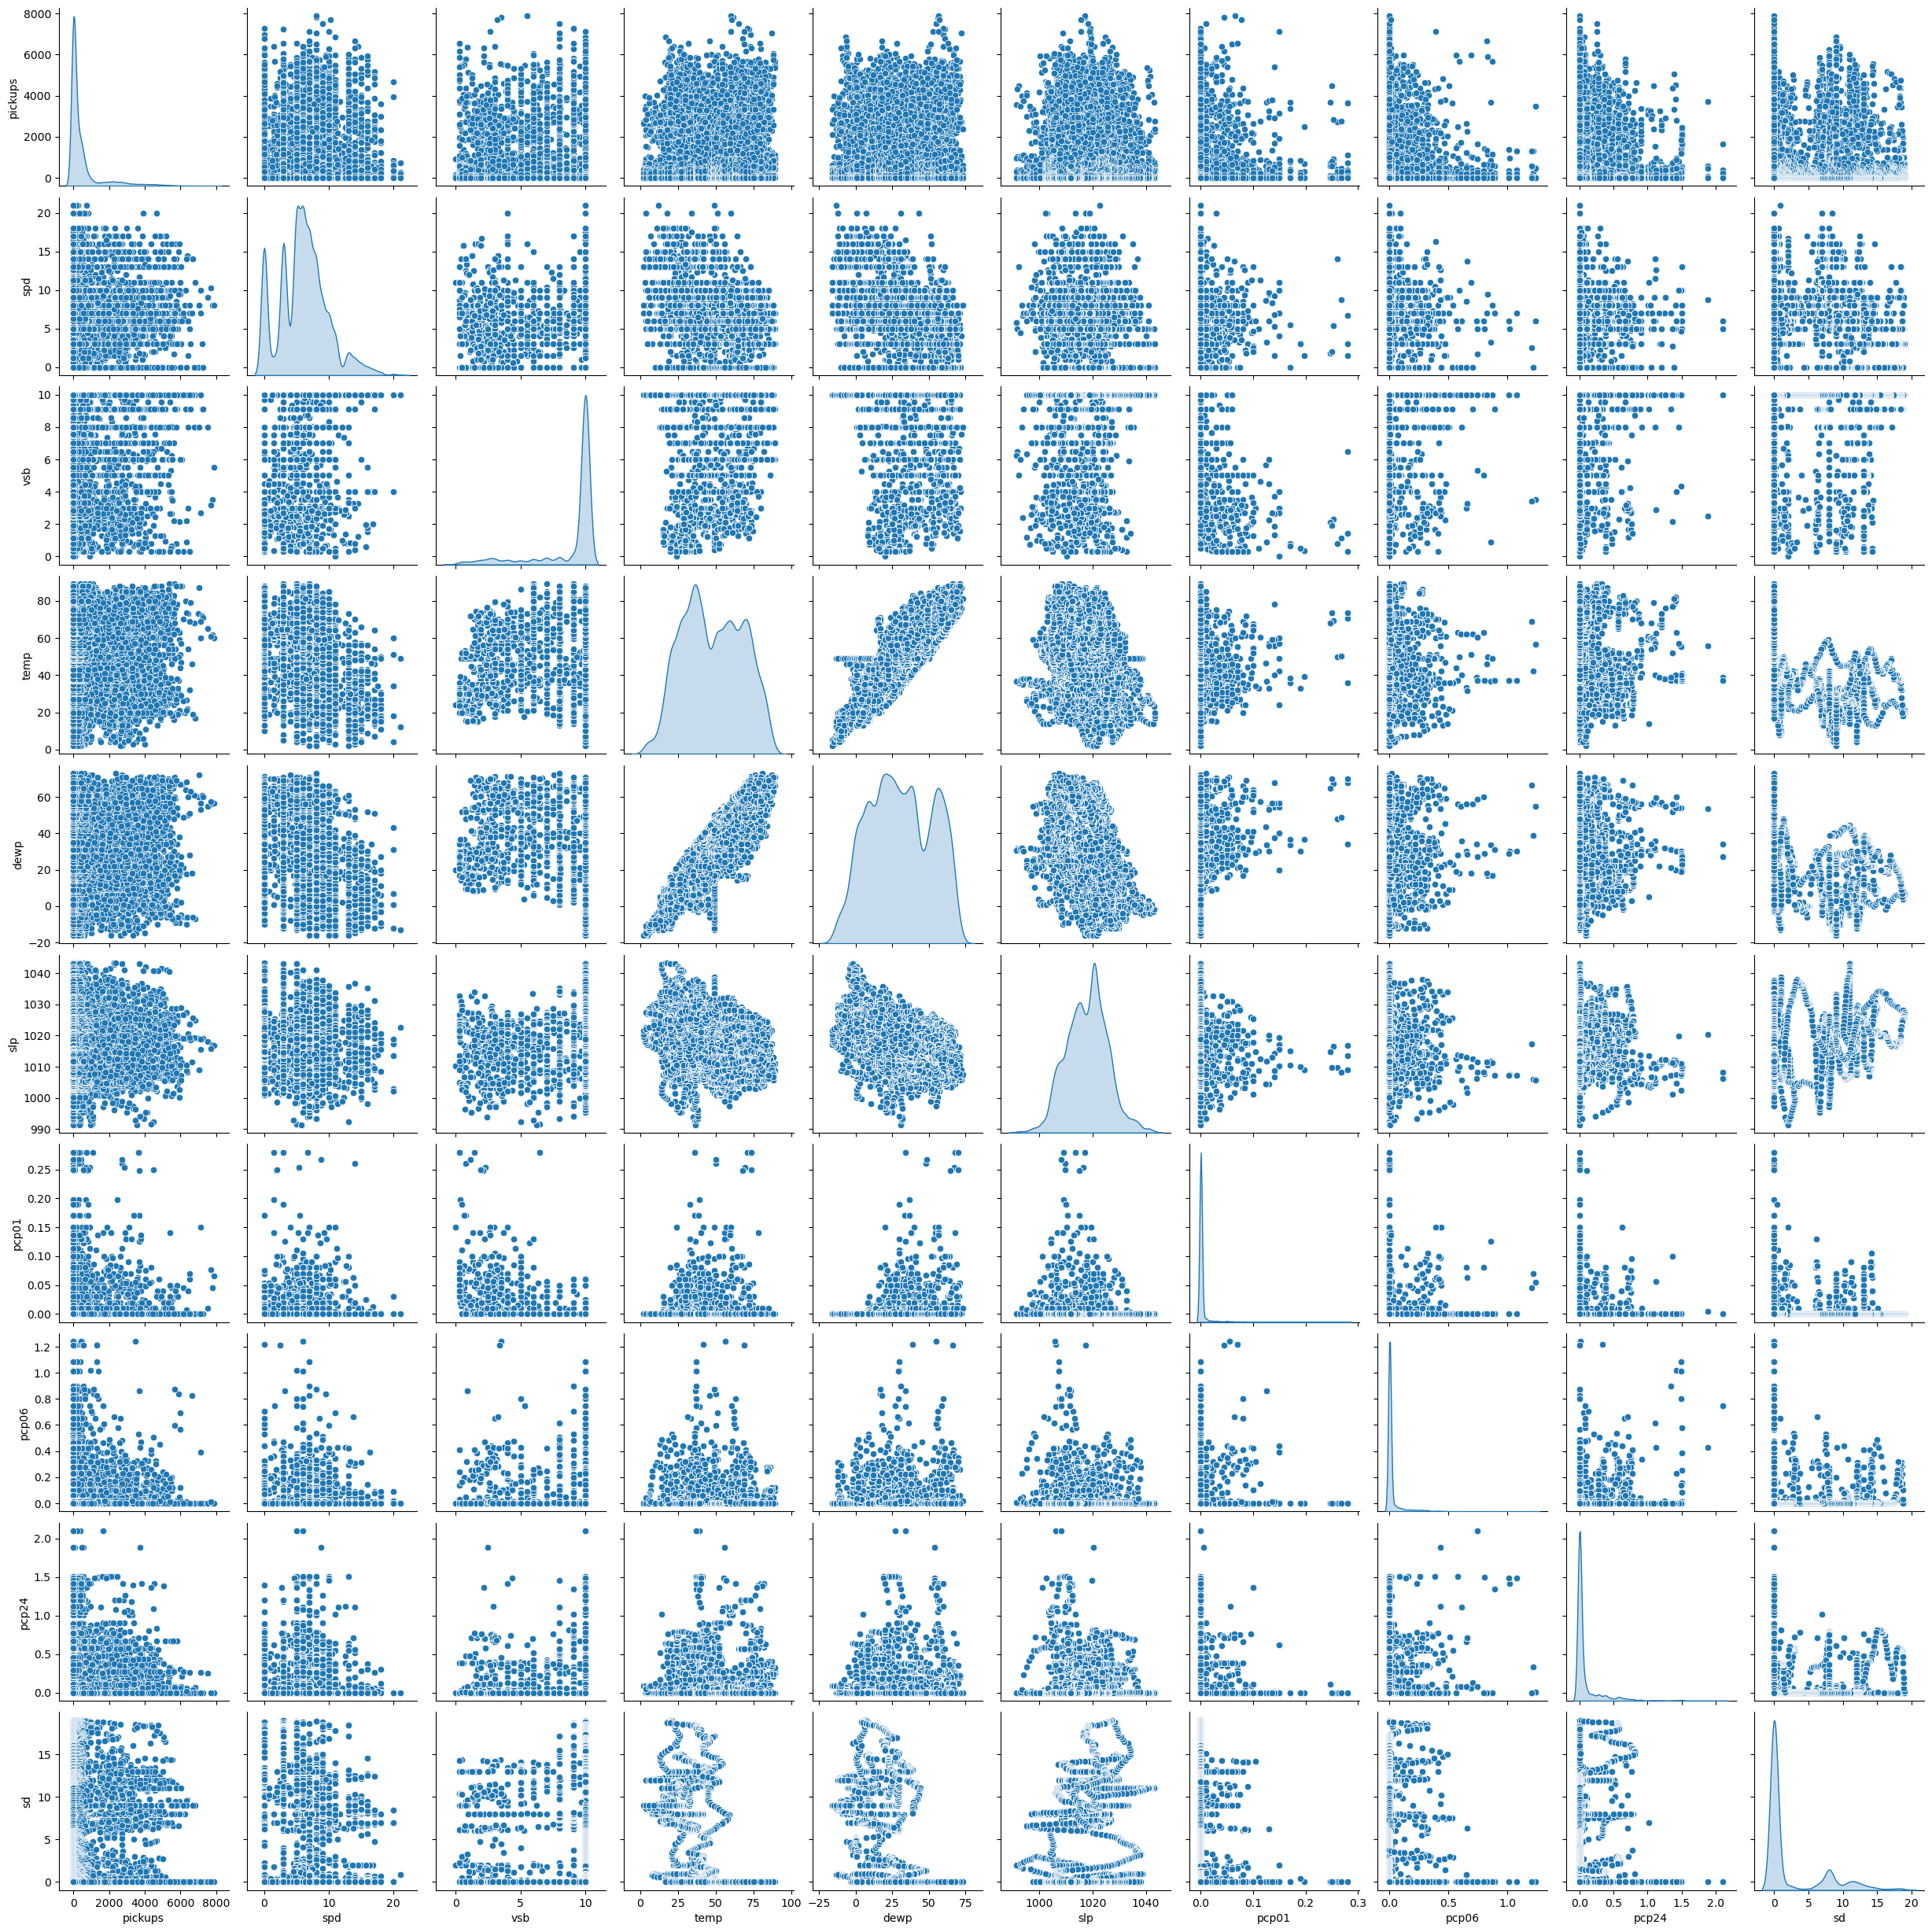

In [57]:
plt.figure(figsize=(25,15))
sns.pairplot(data = df[num], diag_kind ="kde" , palette= 'coral')

In [58]:
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_date,week_day
0,Bronx,152,5.0,10.0,30.00000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,Brooklyn,1519,5.0,10.0,49.13913,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,EWR,0,5.0,10.0,30.00000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,Manhattan,5258,5.0,10.0,30.00000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,Queens,405,5.0,10.0,30.00000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


In [59]:
cats= df.start_month.unique().tolist()

In [60]:
cats

['January', 'February', 'March', 'April', 'May', 'June']

In [62]:
df.start_month = pd.Categorical(df.start_month, ordered = True , categories = cats)

<AxesSubplot:xlabel='start_month', ylabel='pickups'>

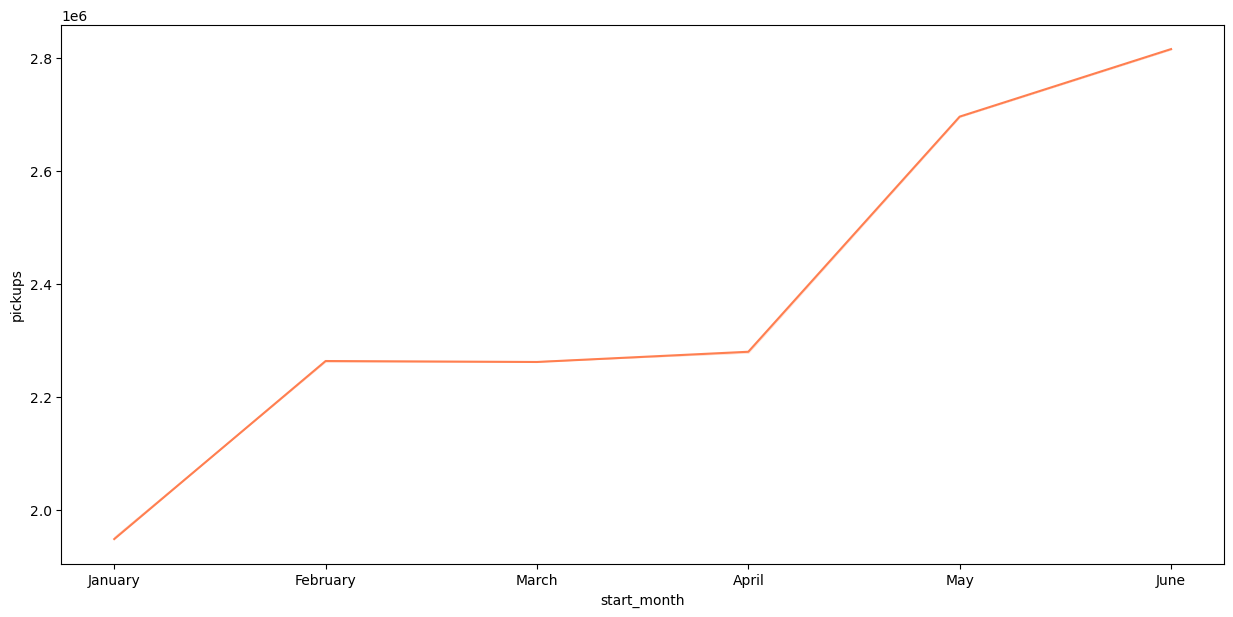

In [63]:
plt.figure(figsize = (15,7))                     # highest picksup in june

sns.lineplot(data =df, x = 'start_month', y = 'pickups', ci = False, color = 'coral', estimator= 'sum')

<AxesSubplot:xlabel='start_date', ylabel='pickups'>

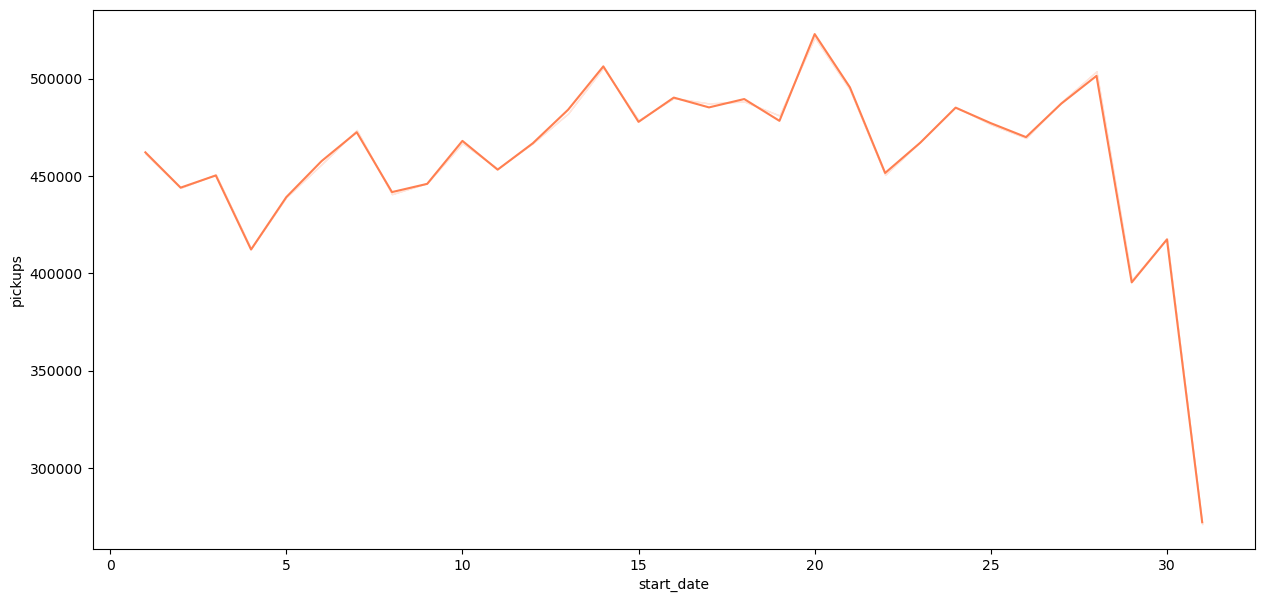

In [65]:
plt.figure(figsize = (15,7))

sns.lineplot(data =df, x = 'start_date', y = 'pickups', ci = False, color = 'coral', estimator= 'sum')

<AxesSubplot:xlabel='start_date', ylabel='pickups'>

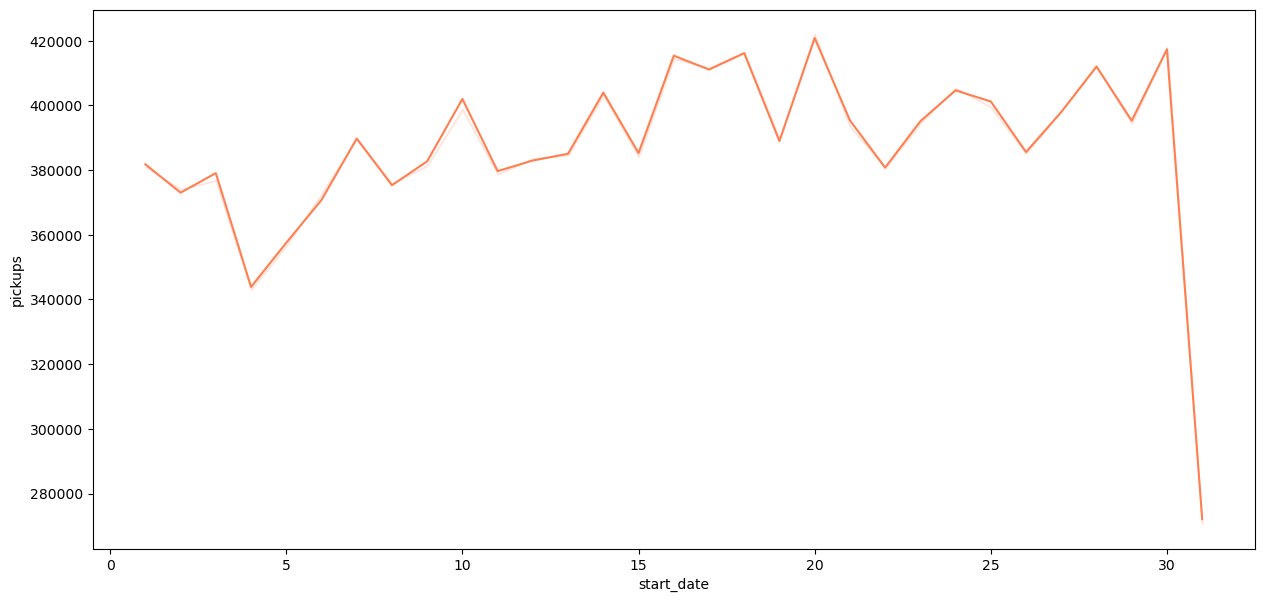

In [66]:
not_feb=  df[df['start_month'] != 'February']

plt.figure(figsize = (15,7))

sns.lineplot(data =not_feb, x = 'start_date', y = 'pickups', ci = False, color = 'coral', estimator= 'sum')

<AxesSubplot:xlabel='start_hour', ylabel='pickups'>

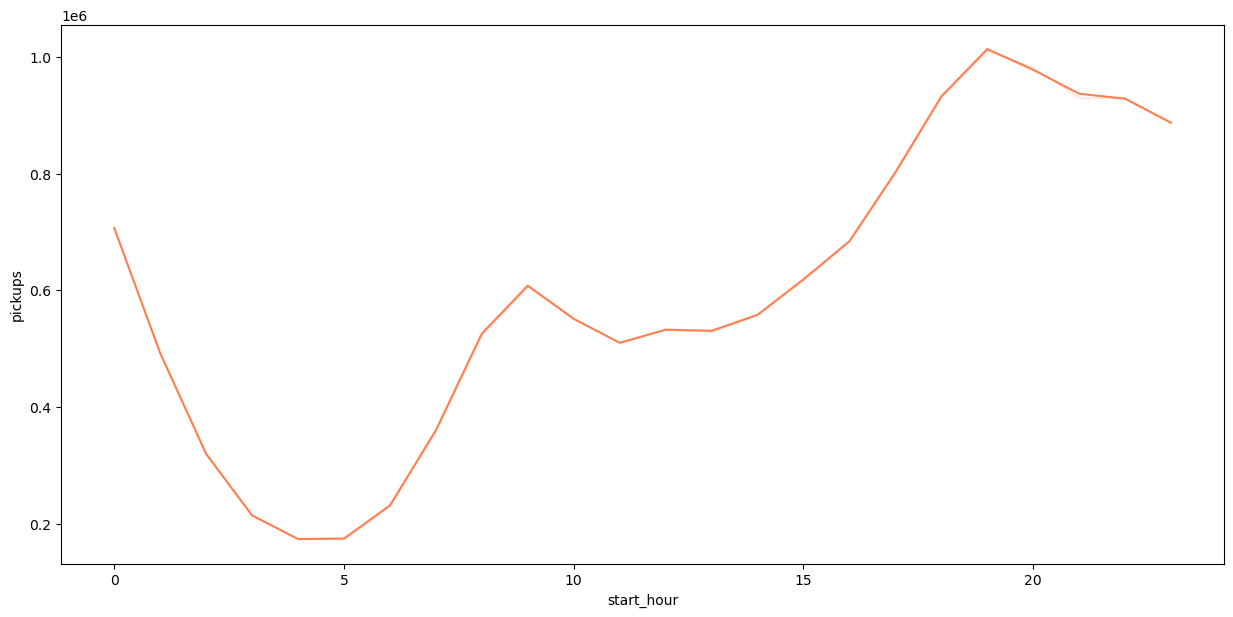

In [67]:
plt.figure(figsize = (15,7))

sns.lineplot(data =df, x = 'start_hour', y = 'pickups', ci = False, color = 'coral', estimator= 'sum')

<AxesSubplot:xlabel='week_day', ylabel='pickups'>

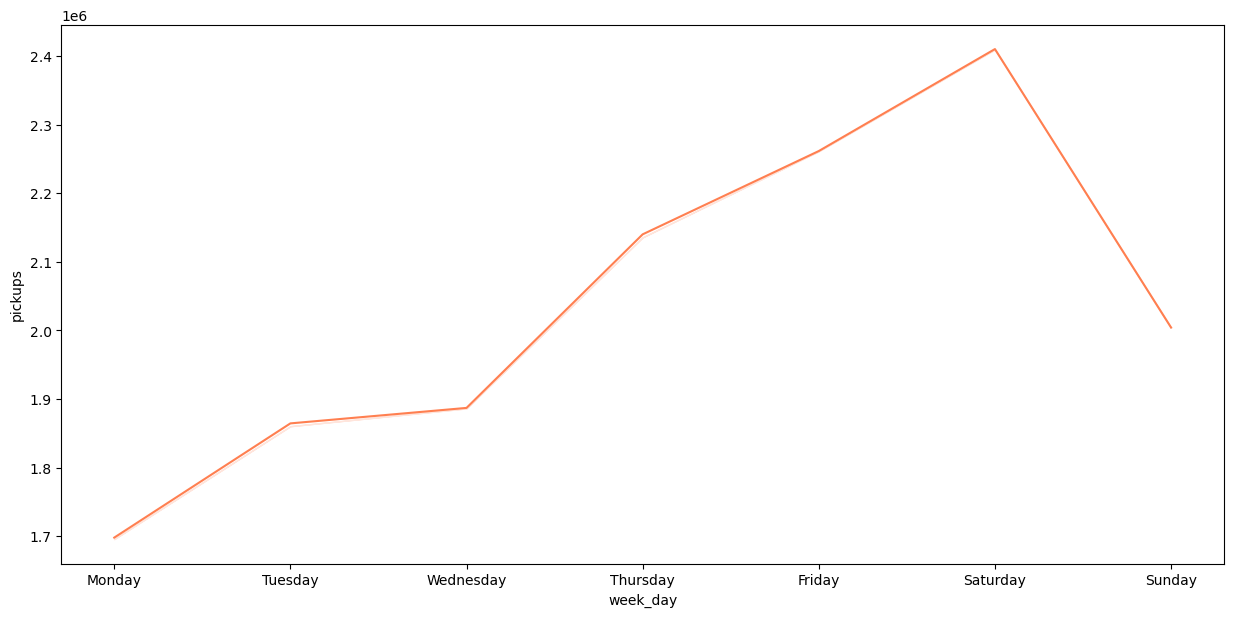

In [68]:
cats_w = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday' ]
df.week_day= pd.Categorical(df.week_day, categories = cats_w)

plt.figure(figsize =(15,7))

sns.lineplot(data=df, x= 'week_day', y= "pickups", ci = False, color = 'coral', estimator ='sum')

In [ ]:
df['week_day'].unique()

<AxesSubplot:xlabel='borough', ylabel='pickups'>

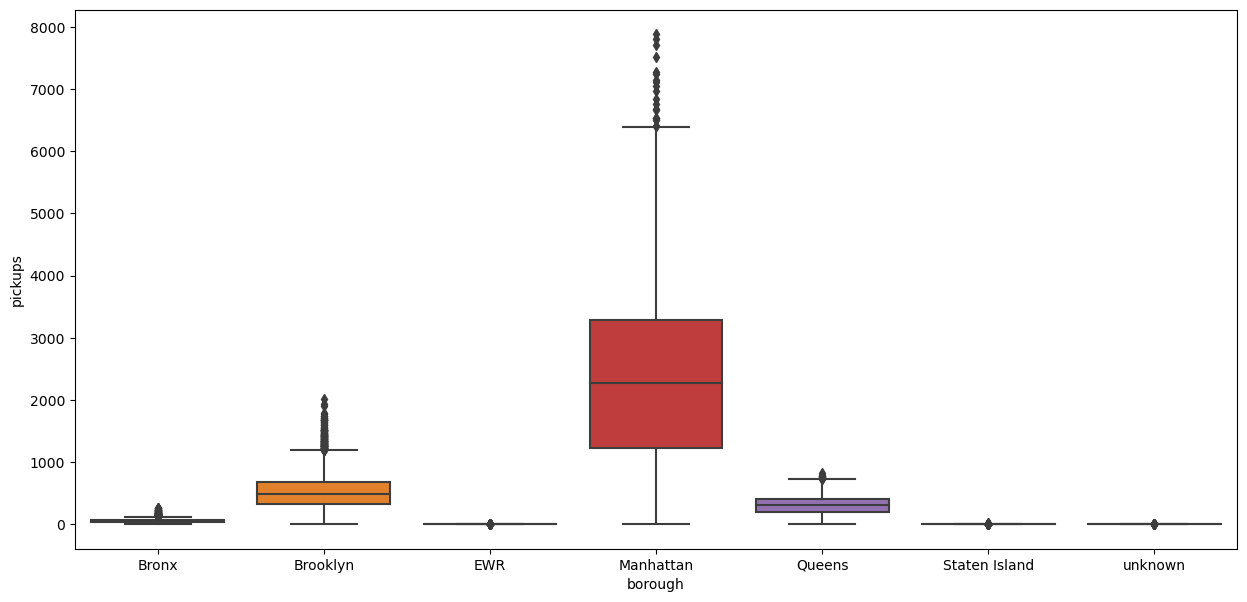

In [69]:
plt.figure(figsize=(15,7))
sns.boxplot(x= df['borough'], y = df['pickups'])               #max of pickup in Manahattan

<Figure size 2000x1200 with 0 Axes>

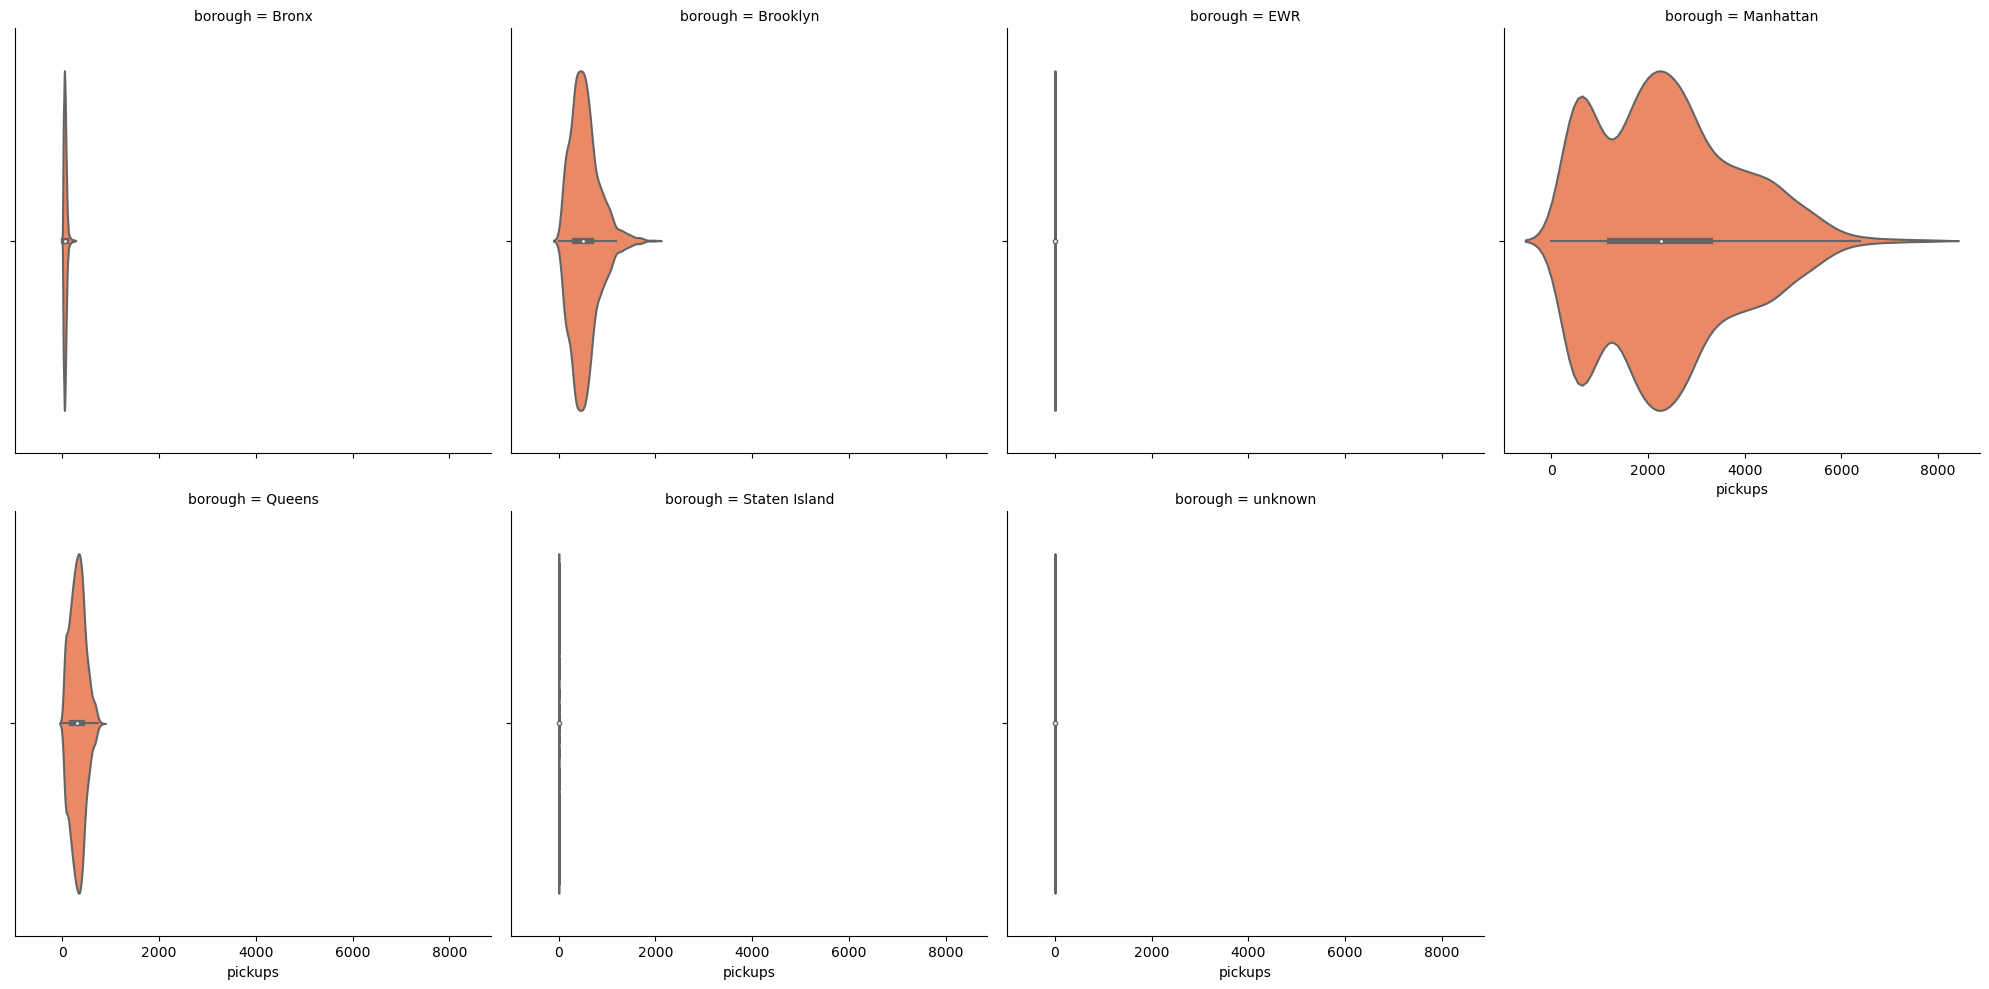

In [70]:
plt.figure(figsize = (20,12))

sns.catplot( x= 'pickups', col = 'borough', data =df , col_wrap = 4, kind = 'violin', color= 'Coral')

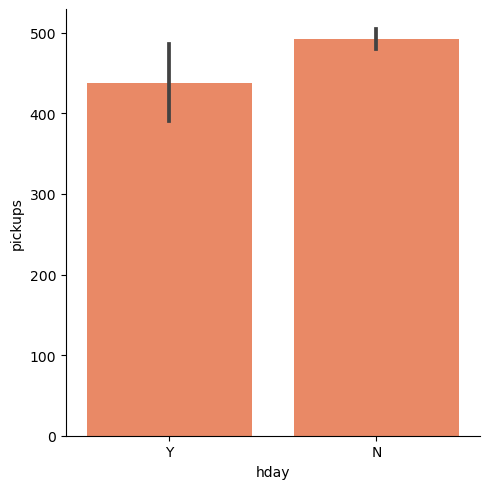

In [71]:
sns.catplot(x ='hday', y = 'pickups', data=df, kind ='bar', color= 'coral')  # cheching holidays and non holidays

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'EWR'),
  Text(3, 0, 'Manhattan'),
  Text(4, 0, 'Queens'),
  Text(5, 0, 'Staten Island'),
  Text(6, 0, 'unknown')])

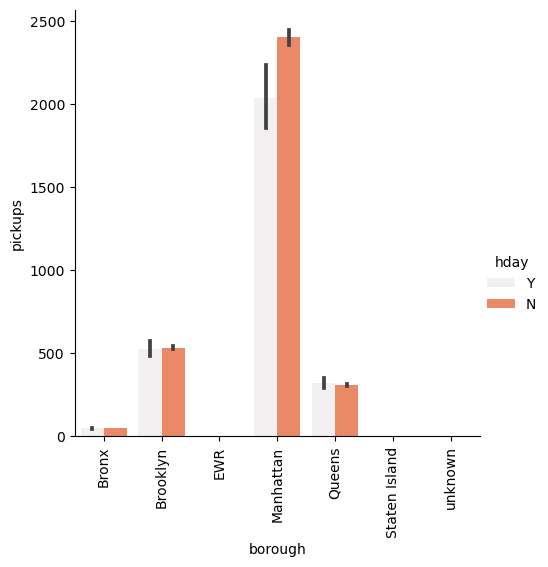

In [73]:
sns.catplot(x ='borough', y = 'pickups', hue = 'hday', data = df , kind= 'bar', color=  'coral')
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='start_hour', ylabel='pickups'>

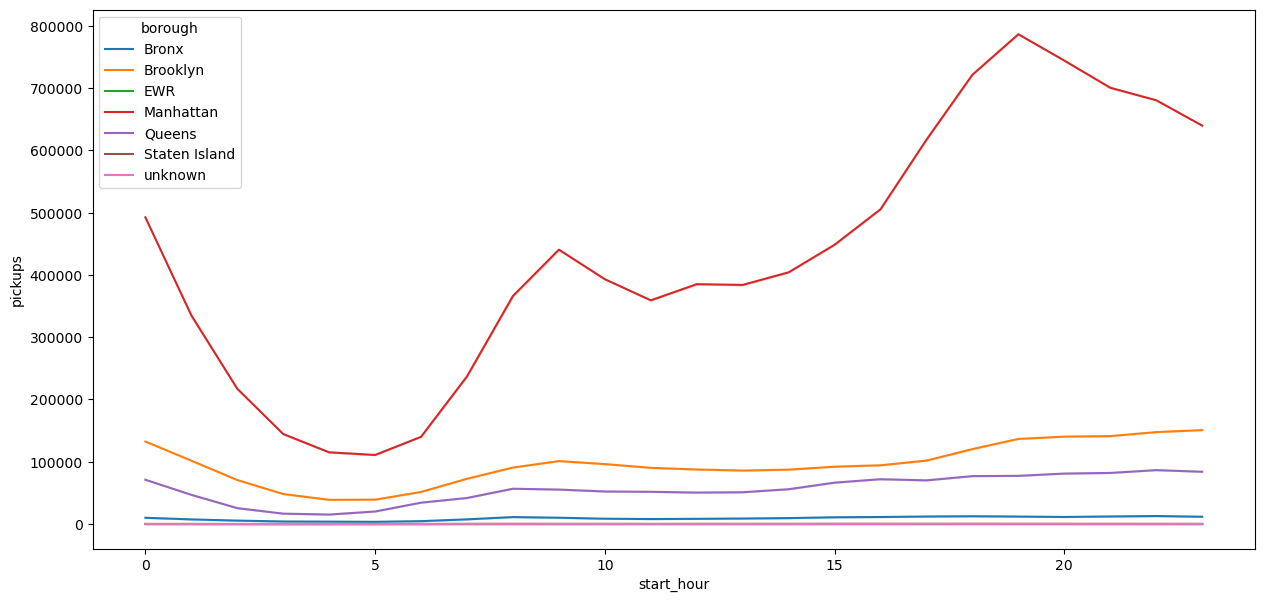

In [74]:
plt.figure(figsize = (15,7)),

sns.lineplot(data =df, x = 'start_hour', y = 'pickups', hue= 'borough', ci = False, color = 'coral', estimator= 'sum')


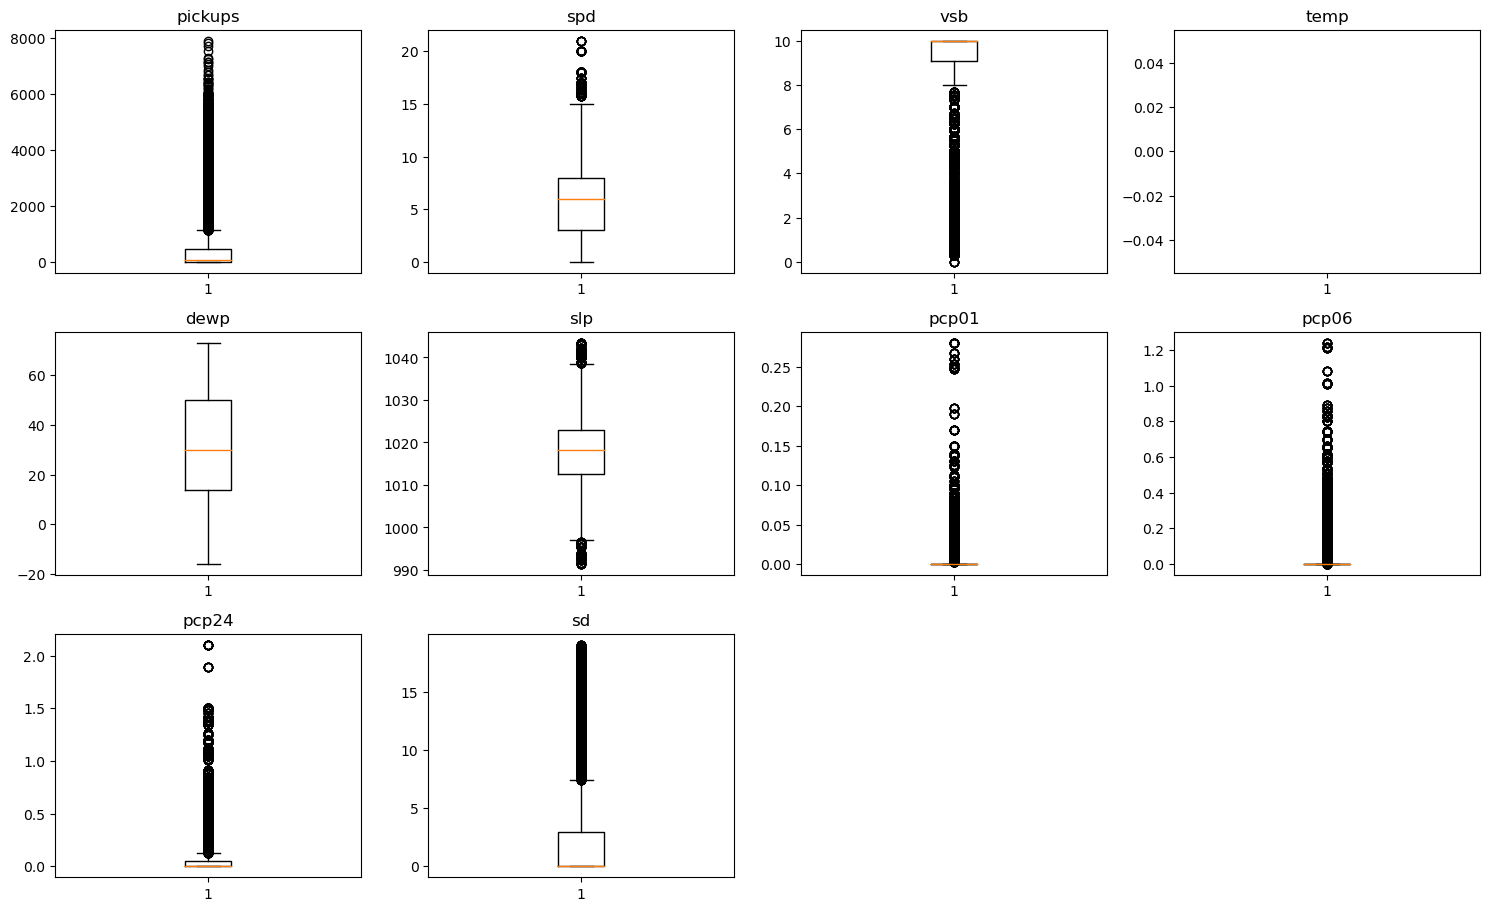

In [18]:
num_col = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
plt.figure(figsize = (15,12))
for i, v in enumerate (num_col):
    plt.subplot(4,4, i+1)
    plt.boxplot(data[v], whis = 1.5)
    plt.tight_layout()
    plt.title(v)

### Actionable Insights and Recommendations
### Insights
We analyzed a dataset of nearly 30K hourly Uber pickup informations, from New York boroughs.
The data spanned over every day of the first six months of the year 2015.
The main feature of interest here is the number of pickups. Both from an environmental and business perspective,
having cars roaming in an area while the demand is in another or filling the streets with 
cars during a low demand period while lacking during peak hours is inefficient. 
Thus we determined the factors that effect pickup and the nature of their effect.

### We have been able to conclude that -

Uber cabs are most popular in the Manhattan area of New York
Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups
The demand for Uber has been increasing steadily over the months (Jan to June)
The rate of pickups is higher on the weekends as compared to weekdays
It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings
We can also conclude that people use Uber for regular office commutes.The demand steadily increases from 6 AM to 10 AM, then declines a little and starts picking up till midnight. The demand peaks at 7-8 PM
We need to further investigate the low demand for Uber on Mondays
Recommendations to business
Manhattan is the most mature market for Uber. Brooklyn, Queens, and Bronx show potential
There has been a gradual increase in Uber rides over the last few months and we need to keep up the momentum
The number of rides are high at peak office commute hours on weekdays and during late evenings on Saturdays. Cab availability must be ensured during these times
The demand for cabs is highest on Saturday nights. Cab availability must be ensured during this time of the week
Data should be procured for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas
More data should be procured on price and a model can be built that can predict optimal pricing
Further Analysis that can be done
Dig deeper to explore the variation of cab demand, during working days and non-working days. You can combine Weekends+Holidays to be non-working days and weekdays to be the working days
Drop the boroughs that have negligible pickups and then analyze the data to uncover more insights

In [ ]:
#================================================================================================================

In [ ]:
num = [2,3,5,6,7,9]

In [ ]:
def find_median(numbers):
    n = len(numbers)
    sorted_numbers = sorted(numbers)
    
    if n % 2 == 0:
        # If the list has an even number of elements, average the two middle numbers
        middle_index_1 = n // 2 - 1
        middle_index_2 = n // 2
        median = (sorted_numbers[middle_index_1] + sorted_numbers[middle_index_2]) / 2
    else:
        # If the list has an odd number of elements, take the middle number
        middle_index = n // 2
        median = sorted_numbers[middle_index]
        
    return median


In [ ]:
num = [2, 3, 5, 6, 7,9]
median = find_median(num)
print(median)  # Output: 5


In [ ]:
n = len(list) 
list.sort()
if n % 2 == 0:
    median1 =list[n//2] median2 = list[n//2 - 1] median = (median1 + median2)/2
    else: 
        median = list[n//2] print("Median is: ")

In [ ]:

list.sort()
n=len (list)
if n % 2 == 0: 
    print(list[n//2 - 1] + list[n//2]) / 2 
else:
    print(list[n//2])

In [ ]:
list.sort() n=len (list) if n % 2 == 0: print(list[n//2 - 1] + list[n//2]) / 2 else: print(list[n//2])


In [ ]:
data1 = {'Name' : ['Pranav', 'Sai', 'Niraj', 'Vijay'],
        'Age' : [27,28,29,30],
        'Address' : ['Nagpur', 'Kanpur', 'Satara', 'Pune'],
        'Qualification' : ['ME', 'MBA', 'MSC', 'MCA']}

data2 = {'Name' : ['Rahul', 'Ayushi', 'Sharvari', 'Dhiraj'],
        'Age' : [22,23,24,25],
        'Address' : ['Mumbai', 'Delhi', 'Wardha', 'Vizag'],
        'Qualification' : ['BE', 'BA', 'BCOM', 'BCA']}

# Converting dictionaries to dataframes
df = pd.DataFrame(data1, index = [0,1,2,3])
df1 = pd.DataFrame(data2, index = [2,3,6,7])

In [ ]:
#concat, append, merge, join

In [ ]:
concatenated_df = pd.concat([df,df1], axis =1)

In [ ]:
df

In [ ]:
merged_df = pd.merge(df,df1, on ='Name')

In [ ]:
joined_df = df.join(df1, how = 'left')

In [ ]:
append_df = pd.append([df, df1], )

In [ ]:
concatenated_df = pd.concat([df, df1], ignore_index=True)

In [ ]:
# join is for index ==== left
# merge is on cloumn===   inner